<a href="https://colab.research.google.com/github/TsangCahya/ds-project/blob/main/Lidia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



##📘 Data Dictionary: Gaji Pekerjaan pada AI, ML, Data Science and Big Data.

Source https://aijobs.net/

data diambil dalam format .csv dengan ukuran 6,7 MB


| Nama Kolom           | Deskripsi                                                                                          | Tipe Data     | Skala Data     | Nilai / Keterangan                                              |
|----------------------|--------------------------------------------------------------------------------------------------|---------------|----------------|----------------------------------------------------------------|
| work_year            | Tahun ketika gaji dibayarkan.                                                                     | Numerik       | Discrete, Interval | 2020, 2021, 2022, 2023, 2024, 2025                                         |
| experience_level     | Tingkat pengalaman dalam pekerjaan selama tahun tersebut.                                         | Kategorikal   | Ordinal        | EN (Entry-level), MI (Menengah), SE (Senior), EX (Eksekutif)  |
| employment_type      | Jenis pekerjaan atau kontrak kerja.                                                              | Kategorikal   | Nominal        | FT (Penuh waktu), PT (Paruh waktu), CT (Kontrak), FL (Freelance)|
| job_title            | Nama jabatan/posisi pekerjaan selama tahun tersebut.                                             | Kategorikal   | Nominal        | Contoh: Data Scientist, Machine Learning Engineer, dll.       |
| salary               | Jumlah total gaji kotor yang dibayarkan.                                                         | Numerik       | Kontinu, Rasio          | Angka (dalam satuan mata uang asli)                            |
| salary_currency      | Mata uang dari gaji yang dibayarkan (kode ISO 4217).                                             | Kategorikal   | Nominal        | Contoh: USD, EUR, GBP                                          |
| salary_in_usd        | Gaji yang telah dikonversi ke USD.                                                               | Numerik       | kotinu, Rasio          | Angka (dalam USD, sudah disesuaikan dengan nilai tukar rata-rata)|
| employee_residence   | Negara tempat tinggal utama karyawan selama tahun bekerja (kode ISO 3166).                        | Kategorikal   | Nominal        | Contoh: US, ID, IN, DE                                        |
| remote_ratio         | Persentase pekerjaan yang dilakukan secara jarak jauh (remote).                                  | Numerik       | Discrete, Interval       | 0 = Tidak remote, 50 = Hybrid, 100 = Sepenuhnya remote        |
| company_location     | Negara lokasi utama kantor/perusahaan tempat bekerja (kode ISO 3166).                            | Kategorikal   | Nominal        | Contoh: US, IN, CA, DE                                        |
| company_size         | Rata-rata jumlah karyawan di perusahaan selama tahun tersebut.                                   | Kategorikal   | Ordinal        | S (<50), M (50–250), L (>250)                                 |




## Pengambilan data


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
import warnings

In [13]:
colors = ["#FF5733", "#33FFC7", "#FF33A8", "#33A8FF", "#FFCE33",
          "#33FF57", "#FF338E", "#337BFF", "#FF8E33", "#334DFF",
          "#B533FF", "#33FFCE", "#FF3333", "#33FF33", "#FF33FF"]

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/TsangCahya/ds-project/refs/heads/main/salaries.csv')

## Karakteristik data

### Mengecek bentuk data

In [15]:
df.shape

(121603, 11)

### Mengecek kolom pada data

In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### Informasi data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121603 entries, 0 to 121602
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           121603 non-null  int64 
 1   experience_level    121603 non-null  object
 2   employment_type     121603 non-null  object
 3   job_title           121603 non-null  object
 4   salary              121603 non-null  int64 
 5   salary_currency     121603 non-null  object
 6   salary_in_usd       121603 non-null  int64 
 7   employee_residence  121603 non-null  object
 8   remote_ratio        121603 non-null  int64 
 9   company_location    121603 non-null  object
 10  company_size        121603 non-null  object
dtypes: int64(4), object(7)
memory usage: 10.2+ MB


### Karakteristik data

In [7]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


Tidak ada missing value


In [8]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Machine Learning Engineer,200000,USD,200000,CA,100,CA,M
1,2025,SE,FT,Machine Learning Engineer,150000,USD,150000,CA,100,CA,M
2,2025,SE,FT,Machine Learning Engineer,315000,USD,315000,US,0,US,M
3,2025,SE,FT,Machine Learning Engineer,252000,USD,252000,US,0,US,M
4,2025,MI,FT,Machine Learning Specialist,158000,USD,158000,US,0,US,M


In [9]:
desc = df.describe(percentiles=[0.10, 0.25, 0.50, 0.75, 0.90]).copy()

# Ubah salary ke satuan ratus ribu (100,000) agar lebih ringkas
desc['salary(x100k)'] = desc['salary'] / 100000
desc['salary_in_usd(x100k USD)'] = desc['salary_in_usd'] / 100000

desc.drop(columns=['salary', 'salary_in_usd'], inplace=True)

desc = desc.round(2)

print(desc)


       work_year  remote_ratio  salary(x100k)  salary_in_usd(x100k USD)
count  121603.00     121603.00           1.22                      1.22
mean     2024.30         20.98           1.62                      1.58
std         0.68         40.64           2.07                      0.74
min      2020.00          0.00           0.14                      0.15
10%      2024.00          0.00           0.75                      0.75
25%      2024.00          0.00           1.06                      1.06
50%      2024.00          0.00           1.47                      1.46
75%      2025.00          0.00           1.99                      1.98
90%      2025.00        100.00           2.51                      2.50
max      2025.00        100.00         304.00                      8.00


Range nilai data pada salary dalam usd bernilai  15000 – 800000

Range nilai data pada work_year berada pada rentang 2020 – 2025

### Terdiri dari apa saja pada atribut kategorikal Job Title

In [10]:
df["job_title"].nunique()

371

Ada 371  nilai berbeda dari atribut job_title

In [11]:
top_20_job_title = df["job_title"].value_counts()[:20]
top_20_job_title

,count
job_title,
Data Scientist,16319
Data Engineer,13878
Software Engineer,13598
Data Analyst,11396
Engineer,8418
Machine Learning Engineer,7801
Manager,5880
Analyst,3762
Research Scientist,3049


Berikut adalah 20 nilai dari job title dengan frekuensi tertinggi

## Statistik

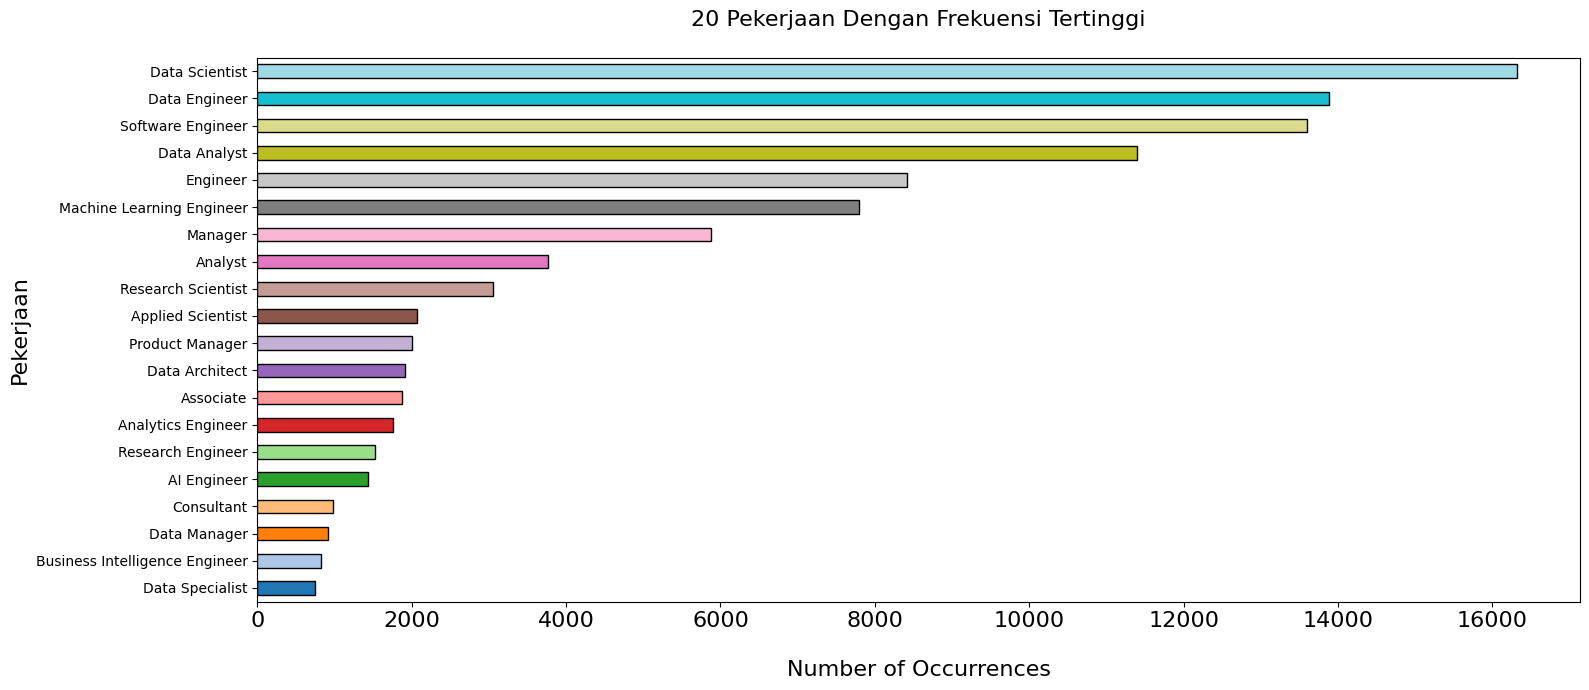

In [12]:
plt.figure(figsize = (16, 7))
top_20_job_title.sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Pekerjaan', fontsize = 16)
plt.xlabel('\nNumber of Occurrences', fontsize = 16)
plt.title('20 Pekerjaan Dengan Frekuensi Tertinggi\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

### Insights

"Data Scientist" menempati posisi teratas dengan 16319 lowongan pekerjaan, men
egaskan kembali perannya sebagai pemimpin di bidang data science. Para data scientist sangat dicari karena keahlian mereka dalam analisis dan pemodelan data yang krusial untuk pengambilan keputusan berbasis data.

"Data Engineer" berada di posisi kedua dengan 13878 lowongan pekerjaan, menunjukkan permintaan yang sangat besar untuk profesional yang ahli dalam data engineering. Hal ini menekankan pentingnya peran infrastruktur data dalam organisasi modern.

"Software Engineer" dengan 13598 lowongan pekerjaan merupakan jabatan penting dalam ekosistem teknologi yang mendukung pengembangan perangkat lunak dan integrasi data. Posisi ini berkontribusi pada pembangunan alat dan sistem yang dibutuhkan untuk pengolahan data yang efisien.**bold text**

In [13]:
desc = df.describe(percentiles=[0.10, 0.25, 0.50, 0.75, 0.90]).copy()

# Ubah salary ke satuan ratus ribu (100,000) agar lebih ringkas
desc['salary(x100k)'] = desc['salary'] / 100000
desc['salary_in_usd(x100k USD)'] = desc['salary_in_usd'] / 100000

desc.drop(columns=['salary', 'salary_in_usd'], inplace=True)

desc = desc.round(2)

print(desc)


       work_year  remote_ratio  salary(x100k)  salary_in_usd(x100k USD)
count  121603.00     121603.00           1.22                      1.22
mean     2024.30         20.98           1.62                      1.58
std         0.68         40.64           2.07                      0.74
min      2020.00          0.00           0.14                      0.15
10%      2024.00          0.00           0.75                      0.75
25%      2024.00          0.00           1.06                      1.06
50%      2024.00          0.00           1.47                      1.46
75%      2025.00          0.00           1.99                      1.98
90%      2025.00        100.00           2.51                      2.50
max      2025.00        100.00         304.00                      8.00


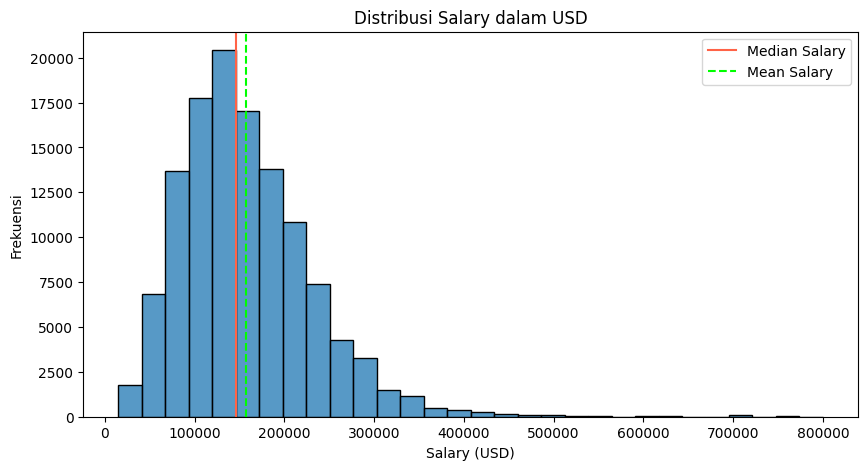

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df['salary_in_usd'], bins=30, kde=False)
plt.axvline(df["salary_in_usd"].median(), color="tomato", label = "Median Salary")
plt.axvline(df["salary_in_usd"].mean(), color="lime", label = "Mean Salary", linestyle="--")

plt.legend()
plt.title('Distribusi Salary dalam USD')
plt.xlabel('Salary (USD)')
plt.ylabel('Frekuensi')
plt.show()

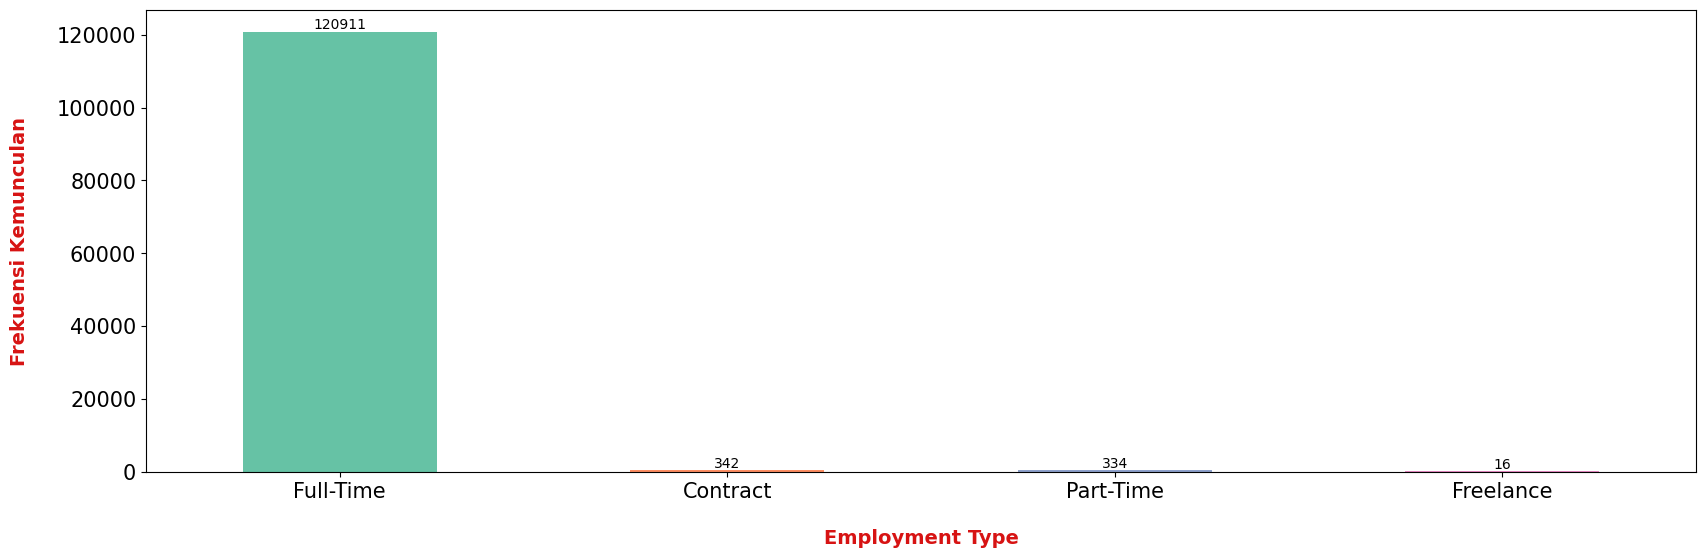

In [15]:
colors = sns.color_palette("Set2")
plt.figure(figsize = (20, 6))
ax = df["employment_type"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Full-Time', 'Contract', 'Part-Time', 'Freelance'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Frekuensi Kemunculan', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

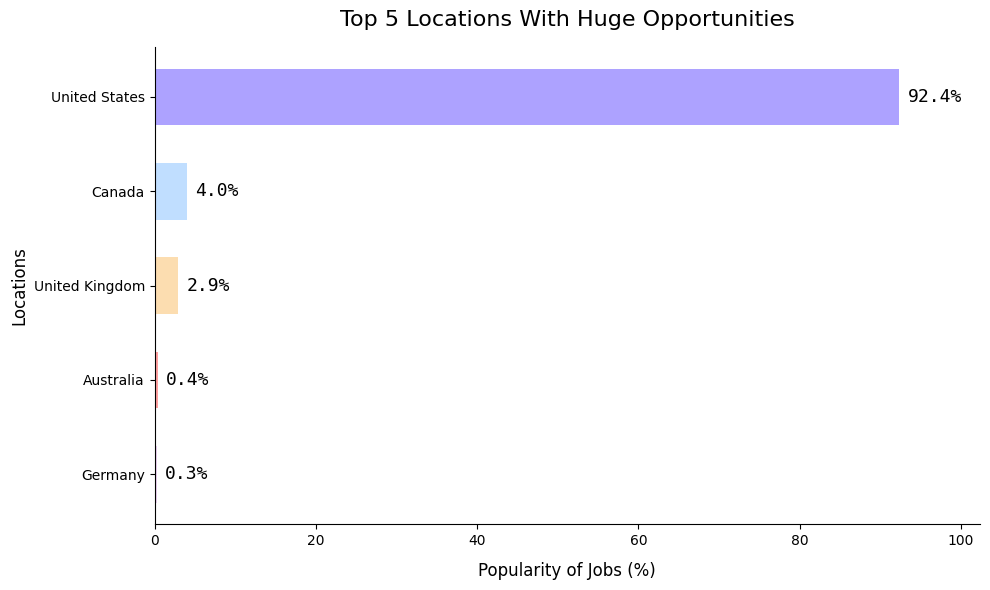

In [16]:


# Mapping nama negara
country_names = {
    "US": "United States",
    "GB": "United Kingdom",
    "CA": "Canada",
    "AU": "Australia",
    "DE": "Germany"
}

# Ambil top 5 lokasi
company_loc = df["company_location"].value_counts()
top_5_loc = company_loc.head(5)
top_5_labels = top_5_loc.index.map(lambda code: country_names.get(code, code))
percentages = (top_5_loc / top_5_loc.sum()) * 100

# Warna pastel sesuai urutan
colors = ["#ADA2FF", "#C0DEFF", "#FCDDB0", "#FF9F9F", "#EDD2F3"]

# Buat plot
fig, ax = plt.subplots(figsize=(10, 6))  # ukuran lebih lebar
bars = ax.barh(top_5_labels, percentages, color=colors, height=0.6)

# Tambahkan persentase di luar bar
for bar, pct in zip(bars, percentages):
    ax.text(
        bar.get_width() + 1,
        bar.get_y() + bar.get_height() / 2,
        f"{pct:.1f}%",
        va='center',
        ha='left',
        fontsize=13,
        fontfamily='monospace'
    )

# Tampilan estetik
ax.set_title("Top 5 Locations With Huge Opportunities", fontsize=16, pad=15)
ax.set_xlabel("Popularity of Jobs (%)", fontsize=12, labelpad=10)
ax.set_ylabel("Locations", fontsize=12)
ax.invert_yaxis()  # ranking tinggi di atas
ax.set_xlim(0, max(percentages) + 10)  # ruang untuk teks
ax.spines[['top', 'right']].set_visible(False)  # hapus garis bingkai

plt.tight_layout()
plt.savefig("top_5_locations.png", dpi=300)
plt.show()


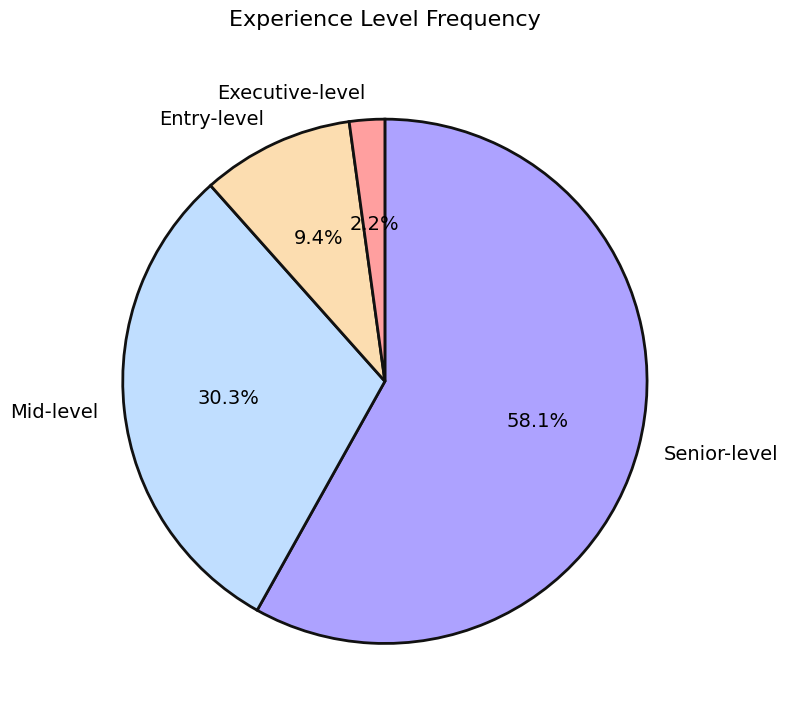

In [17]:

level_labels = {
    "EN": "Entry-level",
    "MI": "Mid-level",
    "SE": "Senior-level",
    "EX": "Executive-level"
}

exp_level = df["experience_level"].value_counts()
exp_labels = exp_level.index.map(lambda x: level_labels.get(x, x))
percentages = (exp_level / exp_level.sum()) * 100

colors = ["#ADA2FF", "#C0DEFF", "#FCDDB0", "#FF9F9F"]

fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    exp_level,
    labels=exp_labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    counterclock=False,
    wedgeprops={'linewidth': 2, 'edgecolor': '#111'},
    textprops={'fontfamily': 'consolas', 'fontsize': 14}
)

# Judul
ax.set_title("Experience Level Frequency", fontsize=16, pad=20)

# Sesuaikan label otomatis (autotexts) agar lebih estetik
for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontfamily('consolas')
    autotext.set_color('#000')

plt.tight_layout()
plt.savefig("experience_level.png", dpi=300, bbox_inches='tight')
plt.show()


### 📊 Insight Statistik Data Gaji

### 🗓️ Tahun (`work_year`)
- Mayoritas data berasal dari tahun **2024**, dengan kuartil atas (75% dan 90%) sudah masuk ke **2025**.
- Ini menunjukkan bahwa dataset mencakup data **terbaru dan prediksi ke depan**.

---

### 💵 Gaji dalam USD (`salary_in_usd`)
- **Rata-rata (mean):** \$157.672
- **Median (50%):** \$146.100 → menunjukkan distribusi sedikit **skewed ke kanan** (positif), karena ada outlier gaji tinggi.
- **Rentang gaji:**
  - Minimum: \$15.000
  - Maksimum: \$800.000 😲
- 📌 Artinya: Terdapat **ketimpangan distribusi gaji**, dengan sebagian kecil pekerjaan berpenghasilan sangat tinggi.

#### 📈 Distribusi Gaji per Persentil:
| Persentil | Gaji (USD) |
|-----------|------------|
| 10%       | 75.000     |
| 25%       | 106.000    |
| 50%       | 146.100    |
| 75%       | 198.000    |
| 90%       | 250.200    |

> 🔍 Sekitar 25% pekerja bergaji di bawah \$106.000 dan 25% lainnya bergaji di atas \$198.000.

---

### 🏠 Tingkat Kerja Jarak Jauh (`remote_ratio`)
- **Median (50%) = 0%** → artinya sebagian besar pekerjaan **bukan remote**.
- Namun, **90% tertinggi mencapai 100% remote**, yang berarti:
  - Sebagian besar tetap onsite/hybrid.
  - Tapi ada **peluang besar** untuk pekerjaan **sepenuhnya remote**, terutama untuk posisi elite.

---

### 🧾 Ringkasan Insight Utama:

| Topik             | Insight Singkat                                                                 |
|-------------------|----------------------------------------------------------------------------------|
| **Tahun**         | Mayoritas data tahun 2024, sebagian masuk 2025.                                 |
| **Gaji**          | Ketimpangan distribusi: ada gap besar antar kuartil.                            |
| **Outlier Gaji**  | Ada pekerjaan dengan gaji hingga \$800.000.                                     |
| **Remote Work**   | Mayoritas belum remote, tapi 10% pekerjaan bersifat 100% remote.                |

---


## Visualisasi

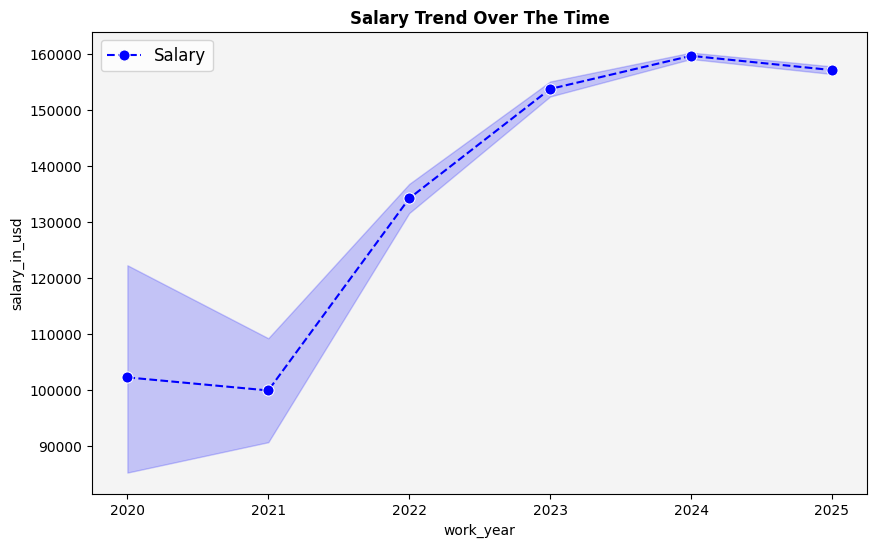

In [18]:
plt.figure(figsize = (10,6))
salary_trend = df[['salary_in_usd', 'work_year']].sort_values(by = 'work_year')
p = sns.lineplot(data =salary_trend ,x = 'work_year', y = 'salary_in_usd', marker = 'o',linestyle='--', color='Blue', markersize=8 )
plt.title('Salary Trend Over The Time', fontsize=12, fontweight='bold')

p.set_facecolor("#f4f4f4")
plt.legend(['Salary'], loc='best', fontsize=12)

p.grid(False)

plt.show()

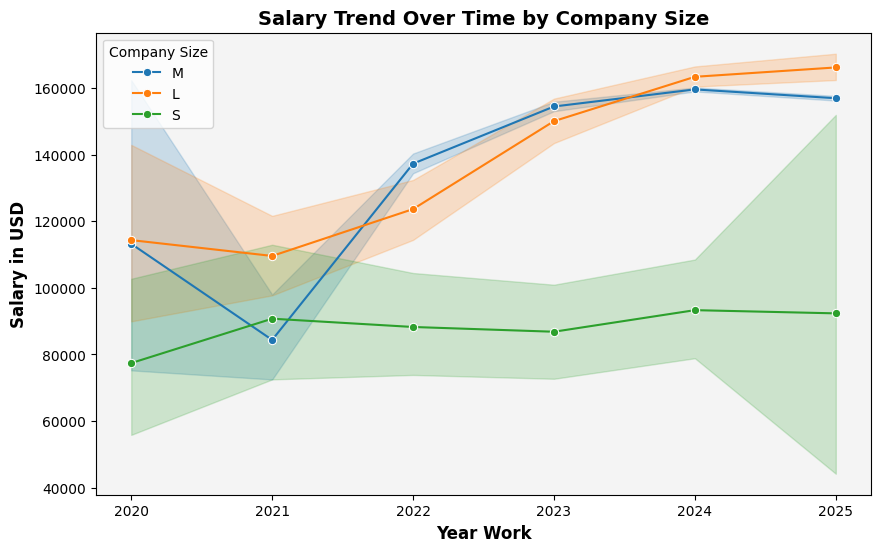

In [19]:
plt.figure(figsize=(10, 6))
p = sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', marker='o')

plt.xlabel('Year Work', fontsize=12, fontweight='bold')
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold')

plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper left')

plt.title('Salary Trend Over Time by Company Size', fontsize=14, fontweight='bold')


p.set_facecolor("#f4f4f4")

p.grid(False)
plt.show()

                      min       25%       50%       75%       max  \
experience_label                                                    
Entry-level       15000.0   62000.0   86488.0  124000.0  793136.0   
Executive-level   15000.0  145500.0  191681.5  250000.0  625000.0   
Mid-level         15000.0   93500.0  130000.0  176000.0  800000.0   
Senior-level      15645.0  123203.0  161300.0  210000.0  800000.0   

                           mean  
experience_label                 
Entry-level        98809.028869  
Executive-level   203012.984894  
Mid-level         143214.957502  
Senior-level      173040.416903  


<ipython-input-17-72260f0da991>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


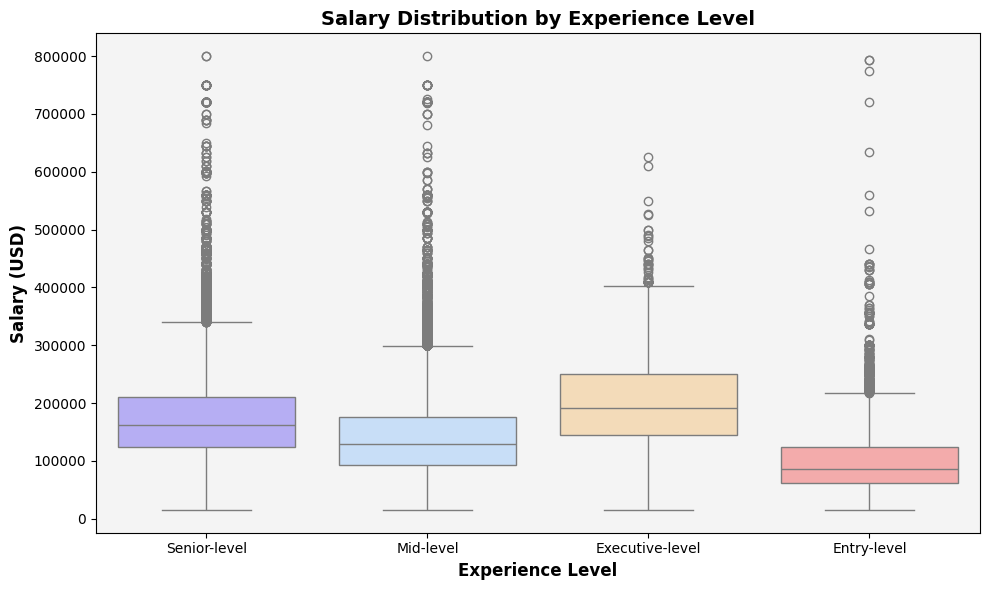

In [17]:
# Mapping label
level_labels = {
    "EN": "Entry-level",
    "MI": "Mid-level",
    "SE": "Senior-level",
    "EX": "Executive-level"
}

# Tambahkan kolom label
df['experience_label'] = df['experience_level'].map(level_labels)

# Hitung statistik deskriptif per level
summary_stats = df.groupby('experience_label')['salary_in_usd'].describe()[['min', '25%', '50%', '75%', 'max', 'mean']]
print(summary_stats)

# Visualisasi boxplot
custom_colors = ["#ADA2FF", "#C0DEFF", "#FCDDB0", "#FF9F9F"]

plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='experience_label',
    y='salary_in_usd',
    data=df,
    palette=custom_colors
)

plt.title('Salary Distribution by Experience Level', fontsize=14, fontweight='bold')
plt.xlabel('Experience Level', fontsize=12, fontweight='bold')
plt.ylabel('Salary (USD)', fontsize=12, fontweight='bold')

ax.set_facecolor("#f4f4f4")
ax.grid(False)

plt.tight_layout()
plt.show()


                      min        25%       50%        75%       max  \
employment_label                                                      
Contract          16000.0   52531.00  100000.0  133750.00  500000.0   
Freelance         20000.0   34630.75   50000.0   60000.00  100000.0   
Full-time         15000.0  106400.00  147000.0  198320.00  800000.0   
Part-time         15966.0   40000.00   58612.0   92431.25  405000.0   

                           mean  
employment_label                 
Contract          102601.667665  
Freelance          50651.562500  
Full-time         158071.701078  
Part-time          75002.953216  


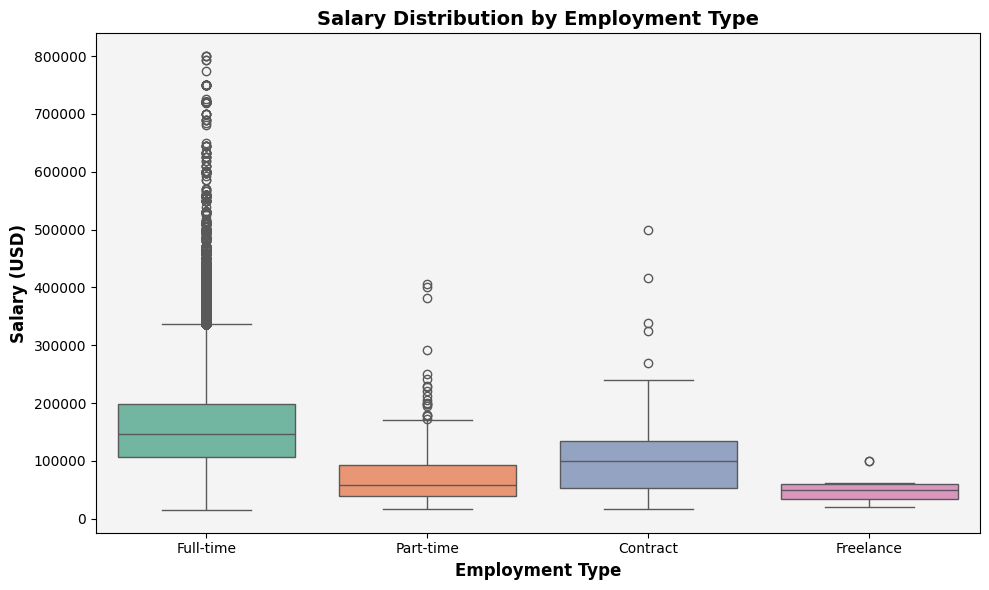

In [18]:
# Mapping label
employment_labels = {
    "FT": "Full-time",
    "PT": "Part-time",
    "CT": "Contract",
    "FL": "Freelance"
}

# Tambahkan kolom label ke DataFrame
df['employment_label'] = df['employment_type'].map(employment_labels)

# Statistik deskriptif untuk gaji berdasarkan employment type
emp_stats = df.groupby('employment_label')['salary_in_usd'].describe()[['min', '25%', '50%', '75%', 'max', 'mean']]
print(emp_stats)

# Visualisasi boxplot
colors = sns.color_palette("Set2")

plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='employment_label',
    y='salary_in_usd',
    data=df,
    palette=colors
)

plt.title('Salary Distribution by Employment Type', fontsize=14, fontweight='bold')
plt.xlabel('Employment Type', fontsize=12, fontweight='bold')
plt.ylabel('Salary (USD)', fontsize=12, fontweight='bold')

ax.set_facecolor("#f4f4f4")
ax.grid(False)

plt.tight_layout()
plt.show()


                        min        25%       50%        75%       max  \
company_size_label                                                      
Large               15000.0  114592.75  143300.0  212800.00  423000.0   
Medium              15000.0  106000.00  146600.0  197200.00  800000.0   
Small               15809.0   50000.00   75324.0  117040.75  416000.0   

                             mean  
company_size_label                 
Large               157360.066946  
Medium              157806.700753  
Small                88012.523364  


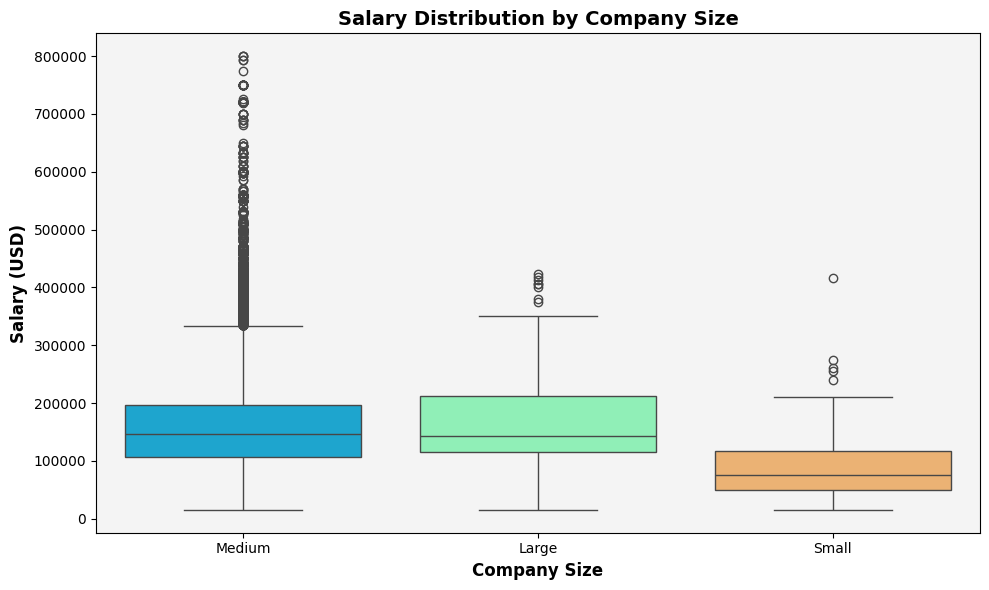

In [19]:
# Mapping label ukuran perusahaan
size_labels = {
    "S": "Small",
    "M": "Medium",
    "L": "Large"
}

# Tambahkan kolom label ke DataFrame
df['company_size_label'] = df['company_size'].map(size_labels)

# Statistik deskriptif gaji berdasarkan company size
company_stats = df.groupby('company_size_label')['salary_in_usd'].describe()[['min', '25%', '50%', '75%', 'max', 'mean']]
print(company_stats)

# Visualisasi boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='company_size_label',
    y='salary_in_usd',
    data=df,
    palette='rainbow'
)

plt.title('Salary Distribution by Company Size', fontsize=14, fontweight='bold')
plt.xlabel('Company Size', fontsize=12, fontweight='bold')
plt.ylabel('Salary (USD)', fontsize=12, fontweight='bold')

ax.set_facecolor("#f4f4f4")
ax.grid(False)

plt.tight_layout()
plt.show()


##Membersihkan Data

### Variabel Dependen : salary_in_usd
### Variabel Independent : experience_level, company_location, company_size, work_year, employment_type, job_title, employee_residence.

### Mengecek Missing Values

In [23]:
df.isnull().sum()


,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


tidak ada missing values

### Mengecek data duplikat

In [24]:
df.duplicated().sum()


np.int64(61986)

hah ada 61986 baris duplikat?? 50% dari total baris??

Kami juga bingung kenapa tugas data cleansingnya setelah EDA

In [25]:
df[df.duplicated()].head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
12,2025,SE,FT,Data Engineer,148800,USD,148800,US,0,US,M
13,2025,SE,FT,Data Engineer,112000,USD,112000,US,0,US,M
14,2025,SE,FT,Data Engineer,148800,USD,148800,US,0,US,M
15,2025,SE,FT,Data Engineer,112000,USD,112000,US,0,US,M
106,2025,SE,FT,Software Engineer,240000,USD,240000,US,0,US,M


Contoh dari data duplikat

In [26]:
df = df.drop_duplicates() #Mengdrop data duplikat


In [27]:
df.duplicated().sum()

np.int64(0)

### Mengecek Nilai aneh


In [28]:
df['salary_in_usd'].describe()
# df['experience_level'].unique()


,salary_in_usd
count,59617.000000
mean,151190.621970
std,77667.579545
min,15000.000000
25%,96147.000000
50%,138800.000000
75%,190000.000000
max,800000.000000


In [29]:
df['experience_level'].unique()

array(['SE', 'MI', 'EX', 'EN'], dtype=object)

### Mengecek outliers

<Axes: xlabel='salary_in_usd'>

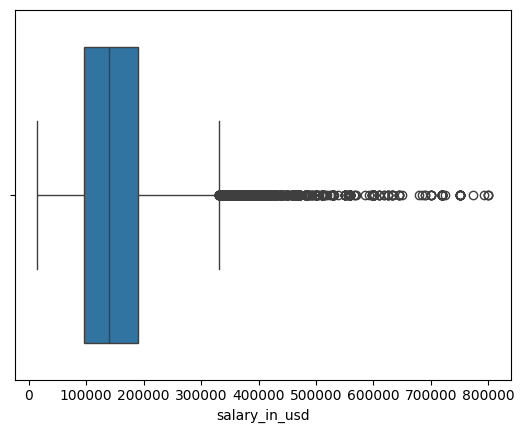

In [30]:
sns.boxplot(x=df['salary_in_usd'])

Di sana memang ada outlier, tetapi karena tujuan dari model kami untuk mengetahui  hubungan antara tempat kerja, tahun kerja, company size, employment type, dan job title dengan salary & rentang gajinya masih masuk akal 800k mungkin saja sepuh jadi kami biarkan outliernya

### Mengecek Format Yang Salah

In [31]:
df.dtypes


,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


In [32]:
df.shape

(59617, 11)

## Membuat Model


### Memilih kolom yang relevan


In [7]:
relevant_columns = [
    'job_title',
    'employee_residence',
    'experience_level',
    'company_location',
    'company_size',
    'work_year',
    'employment_type',
    'remote_ratio',     # ⬅️ Tambahkan ini
    'salary_in_usd'     # target
]

df_model = df[relevant_columns]

df_model.info()
df_model.head() #contoh data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121603 entries, 0 to 121602
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   job_title           121603 non-null  object
 1   employee_residence  121603 non-null  object
 2   experience_level    121603 non-null  object
 3   company_location    121603 non-null  object
 4   company_size        121603 non-null  object
 5   work_year           121603 non-null  int64 
 6   employment_type     121603 non-null  object
 7   remote_ratio        121603 non-null  int64 
 8   salary_in_usd       121603 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 8.3+ MB


,job_title,employee_residence,experience_level,company_location,company_size,work_year,employment_type,remote_ratio,salary_in_usd
0,Machine Learning Engineer,CA,SE,CA,M,2025,FT,100,200000
1,Machine Learning Engineer,CA,SE,CA,M,2025,FT,100,150000
2,Machine Learning Engineer,US,SE,US,M,2025,FT,0,315000
3,Machine Learning Engineer,US,SE,US,M,2025,FT,0,252000
4,Machine Learning Specialist,US,MI,US,M,2025,FT,0,158000


### Mengubah data kategorikal menjadi data numerik

In [8]:
df_dum = pd.get_dummies(df_model, drop_first=True)
df_dum.head()


,work_year,remote_ratio,salary_in_usd,job_title_AI Data Engineer,job_title_AI Data Scientist,job_title_AI Developer,job_title_AI Engineer,job_title_AI Engineering Manager,job_title_AI Governance Lead,job_title_AI Governance Specialist,...,company_location_VE,company_location_VN,company_location_XK,company_location_ZA,company_location_ZM,company_size_M,company_size_S,employment_type_FL,employment_type_FT,employment_type_PT
0,2025,100,200000,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,2025,100,150000,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,2025,0,315000,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,2025,0,252000,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,2025,0,158000,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


### Membagi data untuk dilatih dan diprediksi

In [9]:
X = df_dum.drop('salary_in_usd', axis=1)  # fitur (independent variables)
y = df_dum['salary_in_usd'].values

### Mencoba linear rgression

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [38]:
lm = LinearRegression()
lm.fit(X_train,y_train)

cross_val_score(lm,X_train,y_train, scoring='neg_mean_absolute_error')

array([-47562.29808198, -47615.42624463, -49641.45930256, -48068.29460974,
       -47110.98459083])

In [39]:
cross_val_score(lm,X_train,y_train, scoring='neg_mean_absolute_error', cv=3)

array([-47407.25372736, -48911.9938395 , -47764.05854792])

In [40]:
np.mean(cross_val_score(lm,X_train,y_train, scoring='neg_mean_absolute_error', cv=2))

np.float64(-48198.648609257245)

### Mencoba Lasso regression

In [41]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np



# Bagi data train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat pipeline scaling + Lasso dengan max_iter besar supaya konvergen
pipeline = make_pipeline(
    StandardScaler(),
    Lasso(alpha=1.0, max_iter=20000, random_state=42)
)

# Latih model di data train
pipeline.fit(X_train, y_train)

# Evaluasi model dengan 5-fold cross validation, pakai neg_mean_absolute_error
cv_scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)

print("Cross-validation MAE scores:", -cv_scores)
print("Rata-rata MAE:", -np.mean(cv_scores))

# prediksi di data test
y_pred = pipeline.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Test MAE:", mean_absolute_error(y_test, y_pred))


Cross-validation MAE scores: [47550.13936484 47609.1912038  49635.82929014 48058.34578316
 47106.82519904]
Rata-rata MAE: 47992.06616819787
Test MAE: 47099.57142037583


### Mencoba Random Forest Regressor


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

mae_scores = -cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)

print("Cross-validation MAE scores:", mae_scores)
print("Rata-rata MAE:", np.mean(mae_scores))

# Fit model untuk prediksi langsung
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", test_mae)


Cross-validation MAE scores: [47572.63957265 47860.49138325 49992.83881182 48017.74926799
 47377.61265432]
Rata-rata MAE: 48164.26633800592
Test MAE: 46958.87436443595


### Mencoba XGboost

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

X = df_dum.drop('salary_in_usd', axis=1)
y = df_dum['salary_in_usd'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(random_state=42, n_jobs=-1)

# Parameter grid untuk tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 1.0]
}

# GridSearchCV untuk cari parameter terbaik
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Cross-validation score
cv_scores = cross_val_score(best_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
print("Cross-validation MAE scores:", -cv_scores)
print("Rata-rata MAE:", -np.mean(cv_scores))

# Evaluasi di data test
y_pred = best_model.predict(X_test)
print("Test MAE:", mean_absolute_error(y_test, y_pred))

print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Cross-validation MAE scores: [44817.6484375  45804.90234375 45396.09765625 45430.47265625
 45510.05078125]
Rata-rata MAE: 45391.834375
Test MAE: 45651.41796875
Best Parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.8}


### Mencoba Random FOrest Regressor dengan optimasi


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error


relevant_columns = [
    'job_title',
    'employee_residence',
    'experience_level',
    'company_location',
    'company_size',
    'work_year',
    'employment_type',
    'remote_ratio',
    'salary_in_usd'  # Target
]

df_model = df[relevant_columns].copy()

X = df_model.drop('salary_in_usd', axis=1)
y = df_model['salary_in_usd']

numeric_features = ['work_year', 'remote_ratio']
categorical_features = ['job_title', 'employee_residence', 'experience_level',
                        'company_location', 'company_size', 'employment_type']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

# Cross-validation MAE (negative, perlu dibalik)
cv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
print("Cross-validation MAE scores:", -cv_scores)
print("Rata-rata MAE:", -np.mean(cv_scores))

# Test MAE
y_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", test_mae)


Cross-validation MAE scores: [45664.18631303 46647.6896548  46235.10815152 46279.59404409
 46317.12487949]
Rata-rata MAE: 46228.74060858496
Test MAE: 46498.595104500855


## Kesimpulan

Model terbaik yang digunakan dalam percobaan ini adalah XGBoost dengan MAE sekitar 45 ribu USD dan error sekitar 28,5% . Model ini mengungguli model regresi linear, Lasso Regressor, dan Random Forest Regressor, dan memberikan estimasi gaji yang lebih realistis berdasarkan fitur pengalaman, lokasi, jenis pekerjaan, dan ukuran perusahaan.